In [ ]:
# https://twiecki.io/blog/2018/05/03/copulas/
# Gaussian copula is a fx that couples multi marginal uniform funtions of variables that are correlated. 
# Create uniform prob that match with the joint prob we want to couple

# Copula between the max of the river and the days how many times a flooding occurs.
# Marginal distributions
    # Max river (ETV)=> Gumble distribution
    # When flooding occurs=> Beta distribution (prob of flooding analyzing how many floods vs non-flood occured. Kinfd of binomial distribution)

<b>Import<b>

In [5]:
import matplotlib
import seaborn as sns#High quality charts
from scipy import stats

<b>EXAMPLE: Transform random Normal variable to uniform distribution<b>

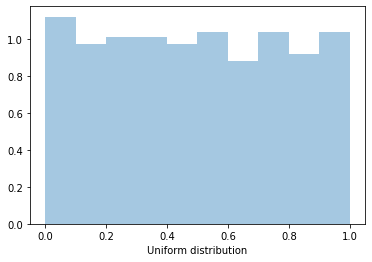

In [39]:
#Sample a uniforme distributions
x=stats.uniform(0,1).rvs(1000) #Uniform distribution from 0 to 1
sns.distplot(x,kde=False,norm_hist=True,axlabel='Uniform distribution') #Histrogram of the uniform random distribution

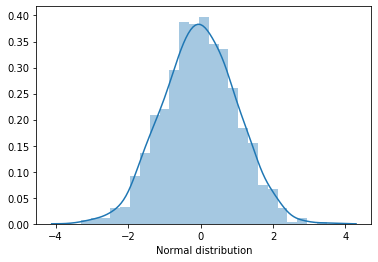

In [40]:
# The goal is to to tranform the inicial dist into a uniform. 
#First we wil transform the uni distribution into a normal distribution using the inverse CDF or (ppf)
norm=stats.distributions.norm()#The normal standarized distribution we want to get
x_trans=norm.ppf(x) #The random uniform sample transformed to normal distribution
sns.distplot(x_trans,axlabel='Normal distribution') #plot the histogram (frecuency)

<b>''====>Looking into ppf<b>

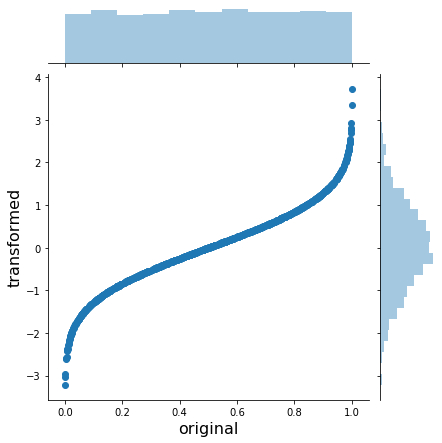

In [19]:
#Plot both funtions together
h=sns.jointplot(x,x_trans,stat_func=None)
h.set_axis_labels('original','transformed',fontsize=16)
#ppf of the uniform stretches the outer region of the uniform to yield a normal

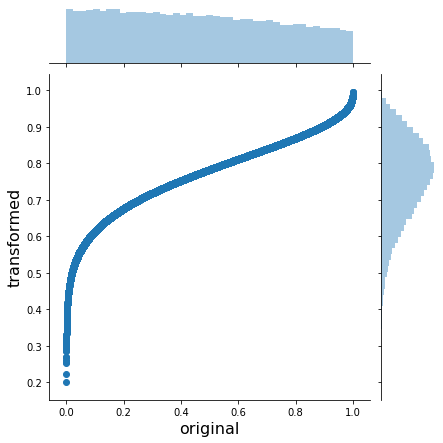

In [65]:
#we can now do the same with a beta distribution
beta=stats.distributions.beta(a=10,b=3) #We want to achieve a beta with parameters a(alfa) and b(beta), define the shape
x_trans=beta.ppf(x)
h=sns.jointplot(x,x_trans,stat_func=None)
h.set_axis_labels('original','transformed',fontsize=16)
#Beta is a positive fx

ValueError: cannot convert float NaN to integer

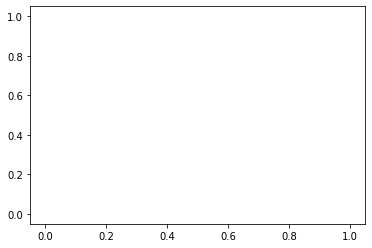

In [66]:
sns.distplot(x_trans,axlabel='Beta distribution')

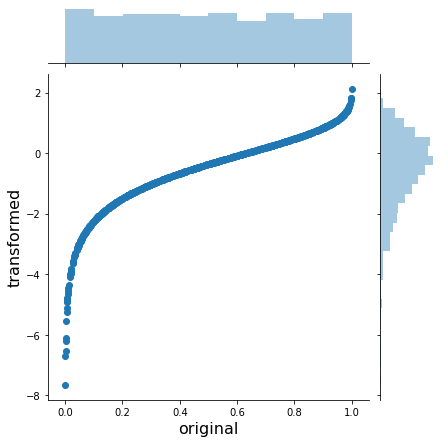

In [47]:
#we can now do the same with the Gumbel
gumbel=stats.distributions.gumbel_l()
x_trans=gumbel.ppf(x)
h=sns.jointplot(x,x_trans,stat_func=None)
h.set_axis_labels('original','transformed',fontsize=16)
#Beta is a positive fx

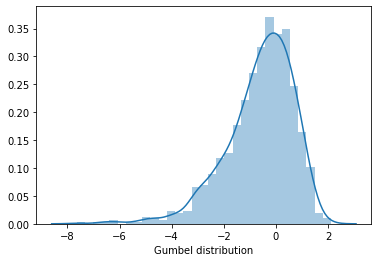

In [48]:
sns.distplot(x_trans,axlabel='Gumbel distribution')

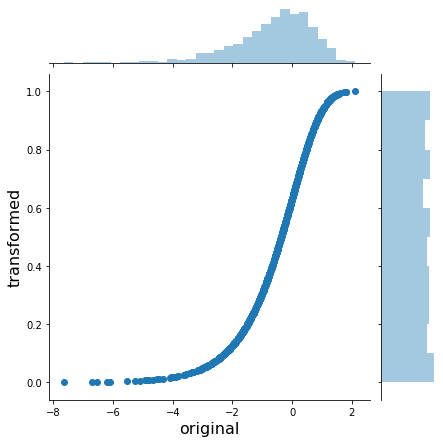

In [49]:
# CDF to transform from de random distribution to the uniform (inverse of ppf)

x_trans_trans=gumbel.cdf(x_trans)
h=sns.jointplot(x_trans,x_trans_trans,stat_func=None)
h.set_axis_labels('original','transformed',fontsize=16)

<b> Addind correlation to the cuple <b>

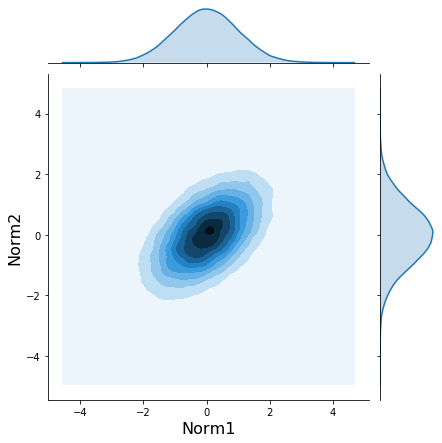

In [56]:
# Now we need to create uniform distribution with the correlation we want
# First we create normal correlated multi-variable samples
mv_norm=stats.multivariate_normal(mean=[0,0],cov=[[1,0.5],[0.5,1]]) #Normal distribution correlated 0,5%
x=mv_norm.rvs(100000)
h=sns.jointplot(x[:,0],x[:,1],kind='kde',stat_func=None) #With dots
#h=sns.jointplot(x[:,0],x[:,1],kind='kde',stat_func=None) #With dots
h.set_axis_labels('Norm1','Norm2',fontsize=16)

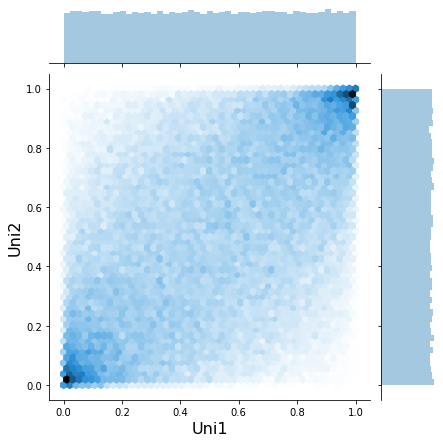

In [57]:
# Now uniform the variables
norm=stats.norm()
x_unif=norm.cdf(x)
h=sns.jointplot(x_unif[:,0],x_unif[:,1],kind='hex',stat_func=None) #With hex dots
h.set_axis_labels('Uni1','Uni2',fontsize=16)

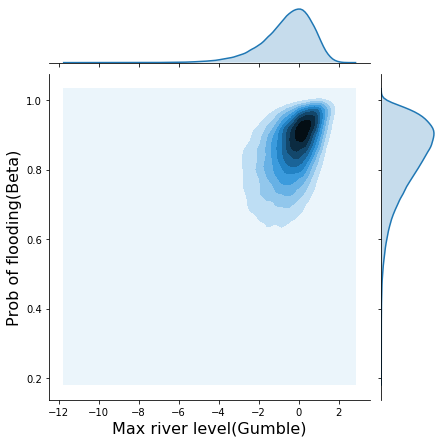

In [64]:
#Now transform the uniforms to the distribution we want (Beta and Gumbel)
m1=stats.distributions.gumbel_l()
m2=stats.distributions.beta(a=10,b=2)

# So the Beta and Gumbel distribution are correlated through the uniform distribution
x1_transform=m1.ppf(x_unif[:,0])
x2_transform=m2.ppf(x_unif[:,1])

h=sns.jointplot(x1_transform,x2_transform,kind='kde',stat_func=None) #With hex dots ,xlim=(-6,-2),ylim=(.6,1.0)
h.set_axis_labels('Max river level(Gumble)','Prob of flooding(Beta)',fontsize=16)

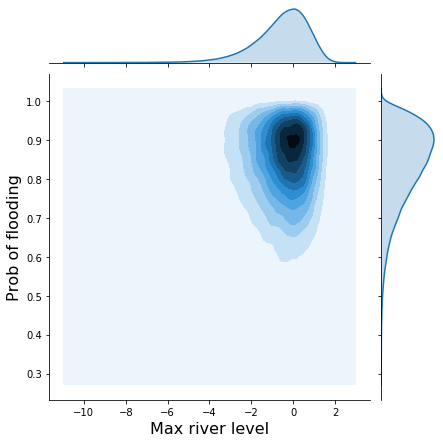

In [63]:
# IF the distributions were not correlated
x1=m1.rvs(100000)
x2=m2.rvs(100000)

h=sns.jointplot(x1,x2,kind='kde',stat_func=None) #With hex dots ,xlim=(-6,-2),ylim=(.6,1.0)
h.set_axis_labels('Max river level','Prob of flooding',fontsize=16)